In [1]:
%matplotlib inline
from collections import defaultdict, namedtuple
from kid_readout.measurement.io import npy

In [2]:
OnOff = namedtuple('OnOff', field_names=['on', 'off'])

In [3]:
# 150 mK, high power
npd = npy.NumpyDirectory('/data/detectors/2016-10-27_114720_sweep_stream_on_off_high_power/')

In [4]:
all_sss_on = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStream')]
all_ss_off = [npd.read(name) for name in npd.node_names() if name.startswith('SingleStream')]

In [5]:
on_off = defaultdict(list)
for n, sss in enumerate(all_sss_on):
    on_off[sss.state.lo_index].append(OnOff(sss.stream, all_ss_off[n]))

In [21]:
ss_on, ss_off = on_off[0][1]

In [22]:
nfft = 2**int(np.floor(np.log2(ss_on.s21_raw.size) - 3))
noverlap = nfft // 2

In [23]:
psd_on, f = plt.mlab.psd(ss_on.s21_raw, Fs=ss_on.stream_sample_rate, NFFT=nfft, noverlap=noverlap, window=plt.mlab.window_hanning)
psd_off, f = plt.mlab.psd(ss_off.s21_raw, Fs=ss_off.stream_sample_rate, NFFT=nfft, noverlap=noverlap, window=plt.mlab.window_hanning)

In [24]:
psd_on[f.size // 2] == psd_on.max()

True

In [25]:
psd_off[f.size // 2] == psd_off.max()

True

In [26]:
psd_on_zero = psd_on[f.size // 2]
psd_off_zero = psd_off[f.size // 2]

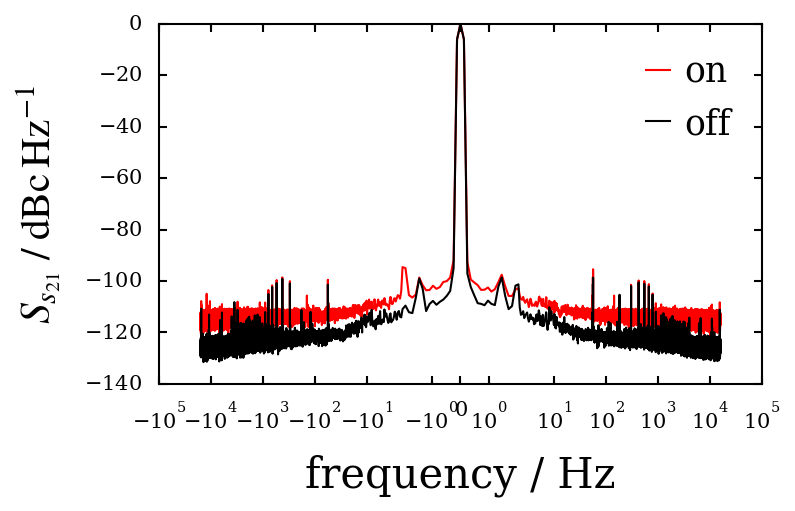

In [27]:
fig, ax = plt.subplots()
ax.set_xscale('symlog')
ax.set_ylabel('$S_{s_{21}} \; / \; \mathrm{dBc} \, \mathrm{Hz}^{-1}$')
ax.set_xlabel('frequency / Hz')
ax.plot(f, 10 * np.log10(psd_on / psd_on_zero), '-r', label='on')
ax.plot(f, 10 * np.log10(psd_off / psd_off_zero), '-k', label='off')
ax.tick_params(labelsize=5)
ax.legend(loc='best');

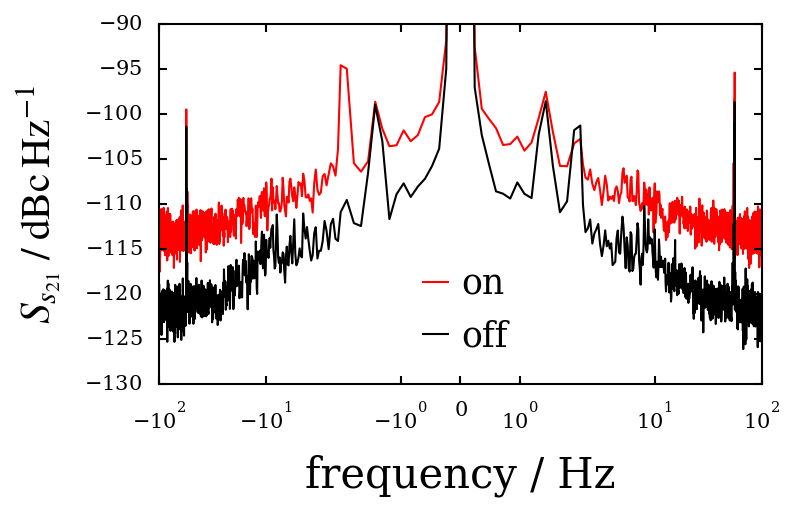

In [31]:
fig, ax = plt.subplots()
ax.set_xscale('symlog')
ax.set_ylabel('$S_{s_{21}} \; / \; \mathrm{dBc} \, \mathrm{Hz}^{-1}$')
ax.set_xlabel('frequency / Hz')
ax.plot(f, 10 * np.log10(psd_on / psd_on_zero), '-r', label='on')
ax.plot(f, 10 * np.log10(psd_off / psd_off_zero), '-k', label='off')
ax.legend(loc='best')
ax.tick_params(labelsize=5)
ax.set_xlim(-1e2, 1e2)
ax.set_ylim(-130, -90);

In [29]:
def plot_on_off_dbc_per_hz(ax, ss_on, ss_off, xlim=(-2e4, 2e4), ylim=(-140, 0)):
    nfft = 2**int(np.floor(np.log2(ss_on.s21_raw.size) - 3))
    noverlap = nfft // 2
    psd_on, f = plt.mlab.psd(ss_on.s21_raw, Fs=ss_on.stream_sample_rate, NFFT=nfft, noverlap=noverlap, window=plt.mlab.window_hanning)
    psd_off, f = plt.mlab.psd(ss_off.s21_raw, Fs=ss_off.stream_sample_rate, NFFT=nfft, noverlap=noverlap, window=plt.mlab.window_hanning)
    psd_on_dbc = psd_on / psd_on[f.size // 2]
    psd_off_dbc = psd_off / psd_off[f.size // 2]
    ax.set_xscale('symlog')
    ax.set_ylabel('$\mathrm{PSD} \; / \; \mathrm{dBc} \, \mathrm{Hz}^{-1}$')
    ax.set_xlabel('frequency / Hz')
    ax.plot(f, 10 * np.log10(psd_on / psd_on_zero), '-r', label='on')
    ax.plot(f, 10 * np.log10(psd_off / psd_off_zero), '-k', label='off')
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

def plot_coherence(ax, ss_a, ss_b):
    nfft = 2**int(np.floor(np.log2(ss_on.s21_raw.size) - 3))
    noverlap = nfft // 2
    c, f = plt.mlab.cohere(ss_a.s21_raw, ss_b.s21_raw, Fs=ss_on.stream_sample_rate, NFFT=nfft, noverlap=noverlap, window=plt.mlab.window_hanning)
    ax.set_xscale('symlog')
    ax.set_yscale('log')
    ax.set_ylabel('$C \; / \; \mathrm{Hz}$')
    ax.set_xlabel('frequency / Hz')
    ax.plot(f, c, '-k')

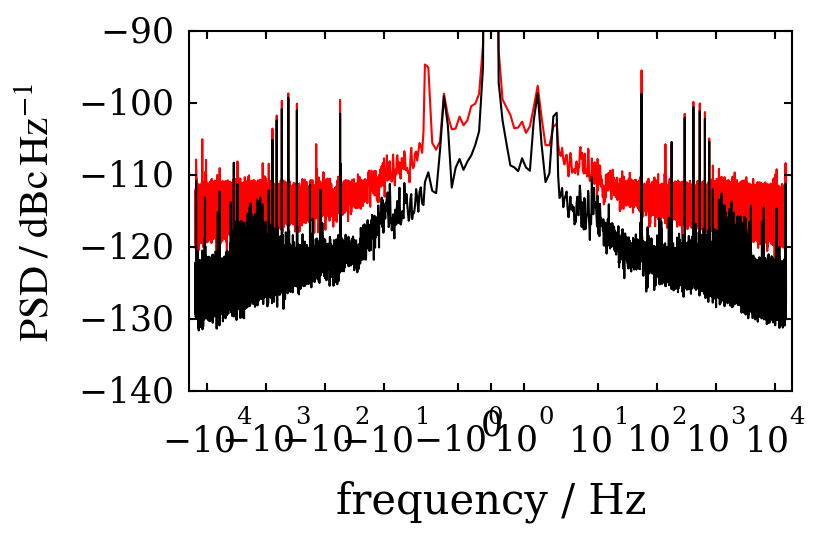

In [30]:
fig, ax = plt.subplots()
plot_on_off_dbc_per_hz(ax, ss_on, ss_off, ylim=(-140, -90))

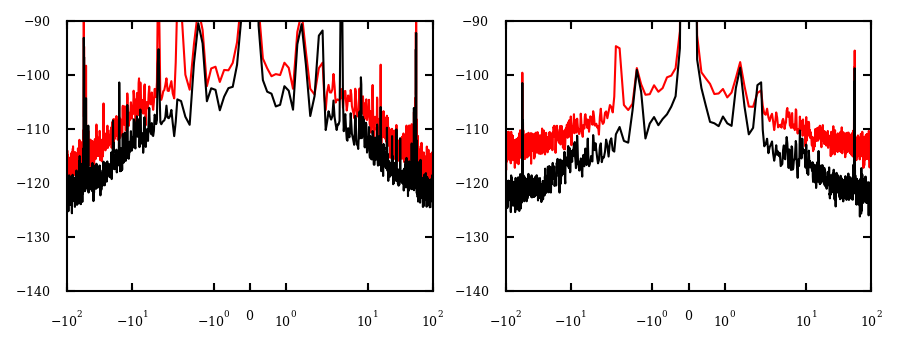

In [34]:
channel = 0
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
for n, ax in enumerate(axes):
    plot_on_off_dbc_per_hz(ax, on_off[channel][n].on, on_off[channel][n].off,
                           xlim=(-100, 100), ylim=(-140, -90))
    ax.tick_params(labelsize=3)
    ax.set_xlabel('')
    ax.set_ylabel('')

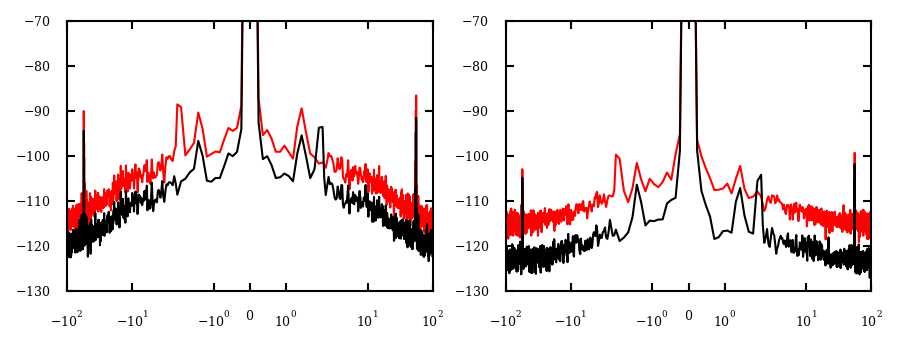

In [33]:
channel = 1
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
for n, ax in enumerate(axes):
    plot_on_off_dbc_per_hz(ax, on_off[channel][n].on, on_off[channel][n].off,
                           xlim=(-100, 100), ylim=(-130, -70))
    ax.tick_params(labelsize=3)
    ax.set_xlabel('')
    ax.set_ylabel('')

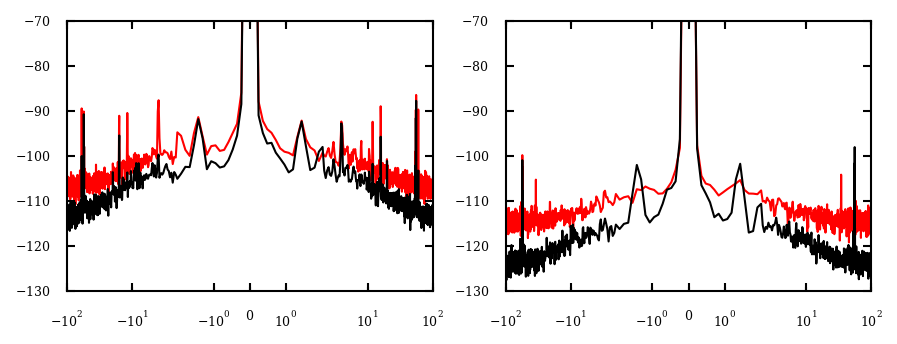

In [35]:
channel = 2
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
for n, ax in enumerate(axes):
    plot_on_off_dbc_per_hz(ax, on_off[channel][n].on, on_off[channel][n].off,
                           xlim=(-100, 100), ylim=(-130, -70))
    ax.tick_params(labelsize=3)
    ax.set_xlabel('')
    ax.set_ylabel('')

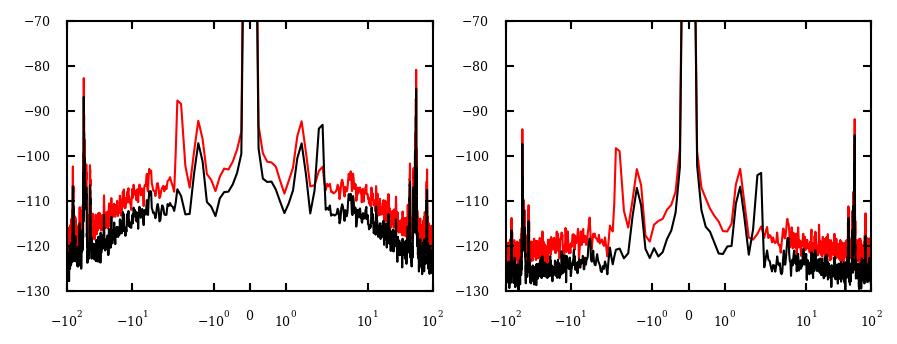

In [36]:
channel = 3
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
for n, ax in enumerate(axes):
    plot_on_off_dbc_per_hz(ax, on_off[channel][n].on, on_off[channel][n].off,
                           xlim=(-100, 100), ylim=(-130, -70))
    ax.tick_params(labelsize=3)
    ax.set_xlabel('')
    ax.set_ylabel('')

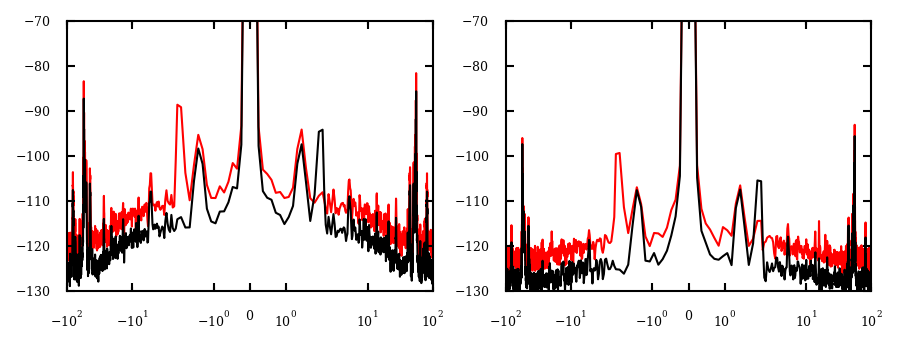

In [37]:
channel = 4
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
for n, ax in enumerate(axes):
    plot_on_off_dbc_per_hz(ax, on_off[channel][n].on, on_off[channel][n].off,
                           xlim=(-100, 100), ylim=(-130, -70))
    ax.tick_params(labelsize=3)
    ax.set_xlabel('')
    ax.set_ylabel('')

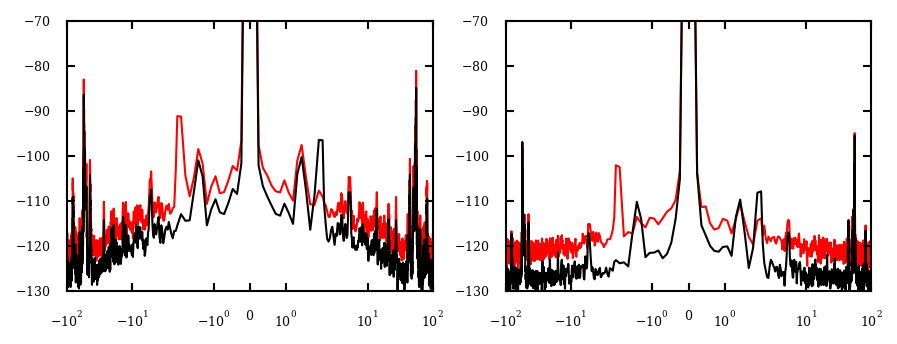

In [38]:
channel = 5
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
for n, ax in enumerate(axes):
    plot_on_off_dbc_per_hz(ax, on_off[channel][n].on, on_off[channel][n].off,
                           xlim=(-100, 100), ylim=(-130, -70))
    ax.tick_params(labelsize=3)
    ax.set_xlabel('')
    ax.set_ylabel('')

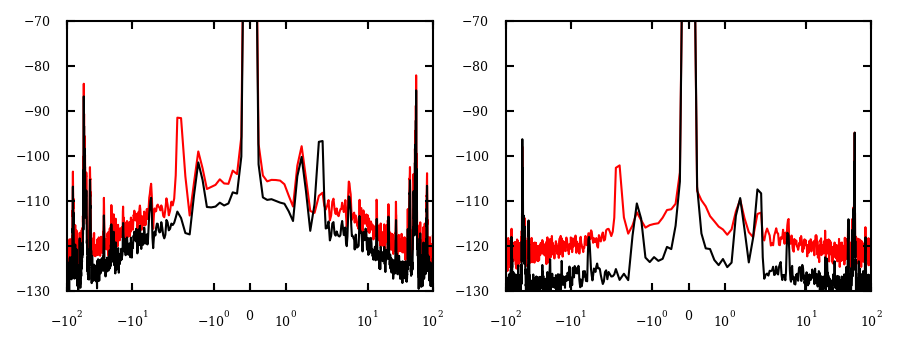

In [39]:
channel = 6
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
for n, ax in enumerate(axes):
    plot_on_off_dbc_per_hz(ax, on_off[channel][n].on, on_off[channel][n].off,
                           xlim=(-100, 100), ylim=(-130, -70))
    ax.tick_params(labelsize=3)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Coherence

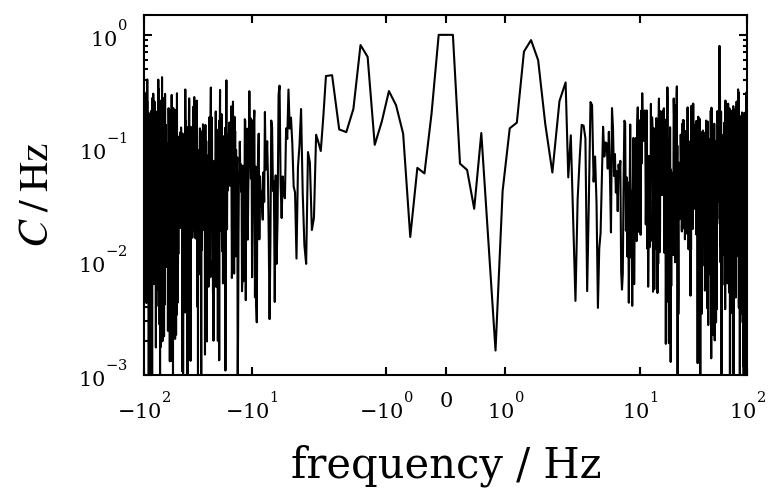

In [40]:
channel = 0
fig, ax = plt.subplots()
plot_coherence(ax, on_off[0][0].on, on_off[0][1].on)
ax.tick_params(labelsize=5)
ax.set_xlim(-1e2, 1e2)
ax.set_ylim(1e-3, 1.5);

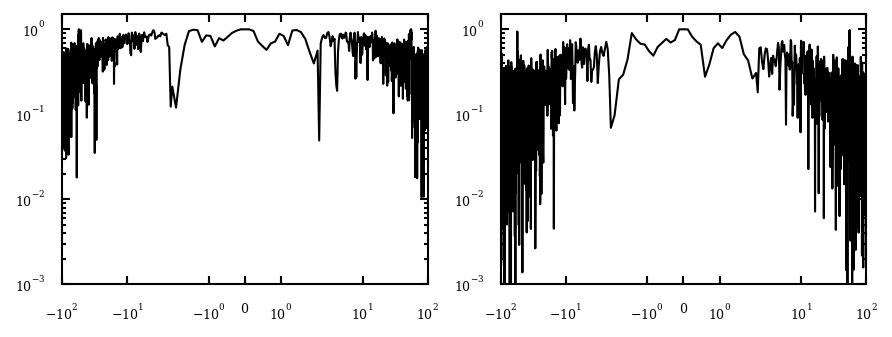

In [41]:
channel = 0
fig, axes = plt.subplots(1, 2, figsize=(4, 1.5))
for n, ax in enumerate(axes):
    plot_coherence(ax, on_off[channel][n].on, on_off[channel][n].off)
    ax.tick_params(labelsize=3)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim(-1e2, 1e2)
    ax.set_ylim(1e-3, 1.5);